<a href="https://colab.research.google.com/github/SantiagoAlbarracin/TP3-SOA/blob/main/TP3_Ej1_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#--------------------------------------INSTALACION DE BIBLIOTECA 'VALIDATORS'--------------------------------------#
!pip install validators

In [ ]:
#--------------------------------------BIBLIOTECAS--------------------------------------#

import validators


#-----------------------------------PARAMETRO IMAGEN------------------------------------#
#@title Ingrese la url de una imagen:

url_imagen = "http://www.fm891.com.ar/wp-content/uploads/2018/04/logo_unlam.png" #@param {type: "string" }

#Verificacion de que el usuario haya ingresado una URL de imagen valida
if(url_imagen == "" or not validators.url(url_imagen)):
  raise TypeError("Debe ingresar la url de una imagen.")

!wget {url_imagen} -O imagen

--2021-06-26 20:56:15--  http://www.fm891.com.ar/wp-content/uploads/2018/04/logo_unlam.png
Resolving www.fm891.com.ar (www.fm891.com.ar)... 107.182.234.238
Connecting to www.fm891.com.ar (www.fm891.com.ar)|107.182.234.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23444 (23K) [image/png]
Saving to: ‘imagen’

imagen              100%[===================>]  22.89K  --.-KB/s    in 0.06s   

2021-06-26 20:56:15 (381 KB/s) - ‘imagen’ saved [23444/23444]



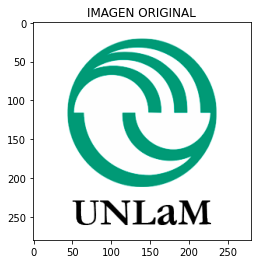

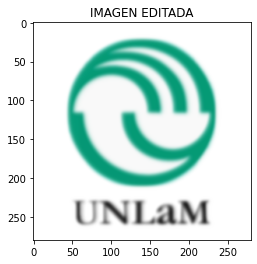

In [ ]:
#--------------------------------------BIBLIOTECAS--------------------------------------#

from datetime import datetime
import numpy as npy
import matplotlib.pyplot as plt
from PIL import Image

#--------------------------------------FUNCIONES--------------------------------------#
def low_pass_filter(array_imagen_cpu, x, y, imagen_width, imagen_height, array_imagen_resultado_cpu, kernel):
    suma_pixel = 0
    suma_pixel = array_imagen_cpu[x-1][y-1] * kernel[0][0] + suma_pixel
    suma_pixel = array_imagen_cpu[x][y-1] * kernel[1][0] + suma_pixel
    suma_pixel = array_imagen_cpu[x+1][y-1] * kernel[2][0] + suma_pixel
    suma_pixel = array_imagen_cpu[x-1][y] * kernel[0][1] + suma_pixel
    suma_pixel = array_imagen_cpu[x][y] * kernel[1][1] + suma_pixel
    suma_pixel = array_imagen_cpu[x+1][y] * kernel[2][1] + suma_pixel
    suma_pixel = array_imagen_cpu[x-1][y+1] * kernel[0][2] + suma_pixel
    suma_pixel = array_imagen_cpu[x][y+1] * kernel[1][2] + suma_pixel
    suma_pixel = array_imagen_cpu[x+1][y+1] * kernel[2][2] + suma_pixel
    array_imagen_resultado_cpu[x][y] = suma_pixel


#---------------------------------PARAMETRO ITERACIONES---------------------------------#

#@title Cantidad de iteraciones

iteraciones =  5#@param {type: "number" }

#Validacion del parametro
if iteraciones <= 0:
    raise TypeError("Debe ingresar un numero mayor a 0.")


#---------------------------------------CODIGO--------------------------------------------#
kernel = [[1/9,1/9,1/9],
          [1/9,1/9,1/9],
          [1/9,1/9,1/9]]

#Apertura de la imagen 
imagen = Image.open('imagen')

#Obtencion de ancho y altura de la imagen
imagen_height, imagen_width = imagen.size

#Calculo de la cantidad de pixeles de la imagen
cantidad_pixeles = imagen_height * imagen_width

#Pasaje de la imagen a un array
array_imagen_cpu = npy.asarray(imagen)

#Generacion de array donde se guardara el resultado
array_imagen_resultado_cpu = array_imagen_cpu.copy()

#Ploteo de la imagen original
plt.figure()
plt.title("IMAGEN ORIGINAL")
imgplot=plt.imshow( array_imagen_cpu )

suma_pixel = 0
#Aplicacion del filtro N veces segun el valor ingresado por el usuario
while iteraciones > 0:
  for y in range( 1, imagen_height - 1 ):
    for x in range( 1, imagen_width - 1 ):
      low_pass_filter(array_imagen_resultado_cpu, x, y, imagen_width, imagen_height, array_imagen_resultado_cpu, kernel)
  iteraciones = iteraciones - 1   

#Ploteo de la imagen resultado
plt.figure()
plt.title("IMAGEN EDITADA")
imgplot=plt.imshow( array_imagen_resultado_cpu )